# 모형의 평가
* Learning curve
* Validation curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')

# Learning Curve 학습 곡선을 사용한 모형의 평가

* learning_curve 함수를 사용.
* 훈련 데이터셋의 샘플 갯수에 따른 영향을 평가하고자 한다.

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =  \
        learning_curve(estimator=model,
                       X=X,
                       y=y,
                       train_sizes=np.linspace(0.1, 1.0, 10),
                       cv=10)

In [ ]:
train_sizes # 훈련데이터의 건수

array([ 51, 102, 153, 204, 256, 307, 358, 409, 460, 512])

In [ ]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

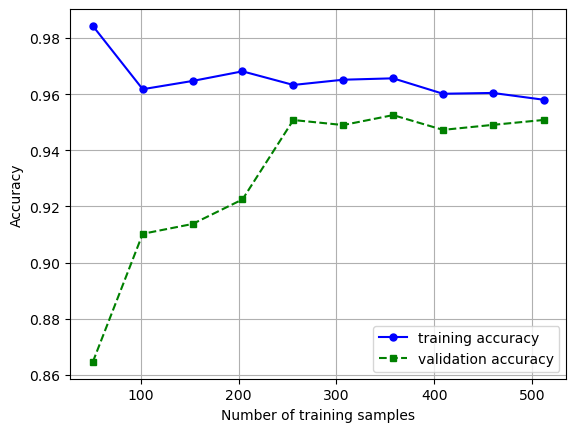

In [ ]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

* train_sizes 파라미터를 통행 훈련세트의 비율을 0.1에서 1.0 사이로 총 10개를 생성
* cv 파라미터를 통해 10-fold CV를 설정
* train 정확도와 validataion 정확도를 시각화
* train 데이터의 비율이 0.7 이상일 경우에 모형의 성능이 좋다.

#  Validation_Curve검증 곡선으로 모형 평가하기


* 일부 하이퍼 파라미터 값을 변경할 때 모형의 성능 변화를 평가하고자 한다.
* validation_curve 함수 사용
    * param_name : 변경할 하이퍼 파라미터의 이름
    * param_range : 사용할 하이퍼파라미터의 범위


In [ ]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=model,
                X=X_train,
                y=y_train,
                param_name='C', # 로지스틱 회귀에서 규제
                param_range=param_range,
                cv=10)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

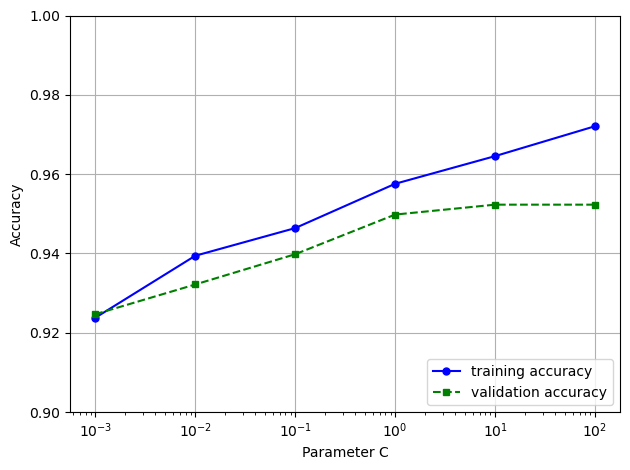

In [ ]:
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.00])
plt.tight_layout()
plt.show()

* validation_curve 함수는 기본적으로 CV를 통해 성능을 추정한다.
* validation_curve 함수 안에서 평가하고자 하는 파라미터를 지정한다.
* C의 값을 높일수록 규제가 약해지고 조금 과대 적합되는 경향이 보인다.

# 실습
1. sklearn의 데이터를 다음과 같이 읽어들이시오.

```
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

```
2. DecisionTree 모형에서 max_depth의 최적값을 validation_curve를 사용하여 찾아보시오.